# INTEGRATE using data from Daugaard in Matlab

1. Setup the data in DATA.h5
2. Setup the prior PRIOR.h5
    1. Setup the prior for the model parameters, and store a sample in PRIOR.h5
    2. Update PRIOR.h5 with corresponding prior data
3. Sample the posterior, and store in POST.h5
4. Compuate and plot posterior statistics


In [ ]:
% Some Paths
addpath /home/au11687/space/PROGRAMMING/sippi
addpath /home/au11687/space/PROGRAMMING/mgstat
sippi_set_path
addpath matlab
addpath data/DAUGGAARD/

In [15]:
% Some choices
usePrior=1;
N=200000;
N_use=N;

ns=400;
autoT = 1;

% Set the HDF5 file with data
f_data_h5='tTEM_20230727_20230814_AVG_export.h5'
f_prior_h5 = 'PRIOR.h5'
f_post_h5 = 'POST.h5'


f_data_h5 = 'tTEM_20230727_20230814_AVG_export.h5'

f_prior_h5 = 'PRIOR.h5'

f_post_h5 = 'POST.h5'

## 1. Setup/define the data
In this case the data is allready setup

/ - 8 datasets
DATA 01/08: ELEVATION [1 6001 ]
DATA 02/08: LINE [1 6001 ]
DATA 03/08: UTMX [1 6001 ]
DATA 04/08: UTMY [1 6001 ]
DATA 05/08: d_obs [40 6001 ]
DATA 06/08: d_std [40 6001 ]
DATA 07/08: i_hm [1 26 ]
DATA 08/08: i_lm [1 14 ]
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


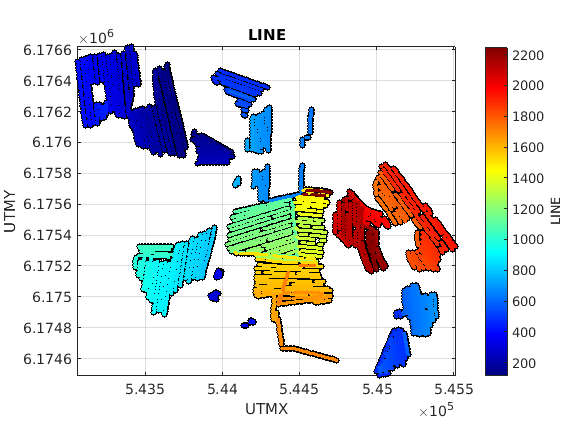

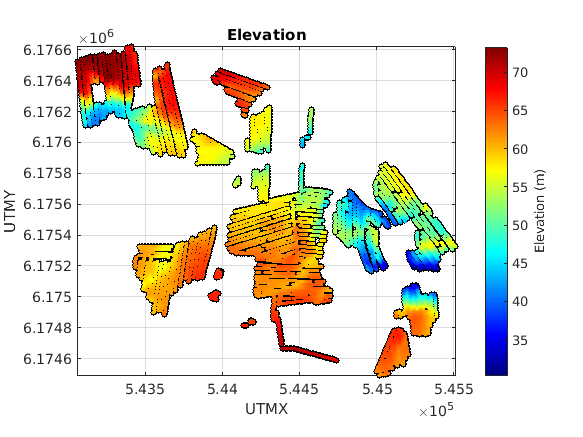

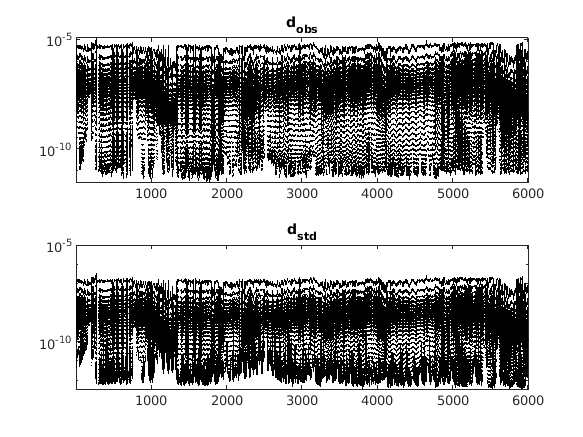

In [16]:
h5ls(f_data_h5)
% load the geometry
[X,Y,ELE,LINE]=integrate_get_geometry(f_data_h5);
% plot the data and geometry
integrate_plot_data(f_data_h5);

## 2. Setup the prior model

### 2A. Setup the prior for the model parameters
In this exanmple a 10-layer Workbench type prior is chosen, and 'N' realizations are computed and stored in 'f_prior_h5'.

In [17]:
% SETUP THE PRIOR MODEL
clear prior
prior{1}.type='workbench';
prior{1}.nlayers=10;      % number of layers
prior{1}.x1=0;            % min depth
prior{1}.x2=100;          % max depth    
prior{1}.v_min = 1;     % min value
prior{1}.v_max = 2500;   % max value
prior{1}.v_log = 1;     % [0]:,[1]:log-uniform
prior{1}.name=sprintf('nl%d_z%d',prior{1}.nlayers,prior{1}.x2);

f_prior_h5 = integrate_prior_sippi(prior,N);

           ++++++++++++++++++++++----------------------- 50.0 100000/200000
           +++++++++++++++++++++++++++++++++++++++++++++ 100.0 200000/200000
integrate_prior_sippi: Writing to PRIOR_WORKBENCH-nl10_z100_N200000.h5


In [18]:
h5ls(f_prior_h5)

/ - 1 datasets
DATA 01/01: M1 [10 200000 ]
   ATT is_discrete --> 0
   ATT z --> dim [10 1 ]
   ATT clim --> dim [2 1 ]
   ATT name --> "WORKBENCH - Resistivity"


### 2B. Compute prior data

In [19]:
id=1; % id of the data to compute, here '/D1'
f_prior_h5 = integrate_prior_data_gaaem(f_data_h5,f_prior_h5,id);

integrate_prior_data_gaaem: Reading GEX file TX07_20230731_2x4_RC20-33.gex
read_gex: Reading 'TX07_20230731_2x4_RC20-33.gex'
WriteSTMfiles: writing LM to /mnt/space/space_au11687/PROGRAMMING/integrate_mockup/TX07_20230731_2x4_RC20-33_tTEM42_LM.stm
WriteSTMfiles: writing HM to /mnt/space/space_au11687/PROGRAMMING/integrate_mockup/TX07_20230731_2x4_RC20-33_tTEM42_HM.stm
copy PRIOR_WORKBENCH-nl10_z100_N200000.h5 PRIOR_WORKBENCH-nl10_z100_N200000_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_RC20-33.h5 START
copy PRIOR_WORKBENCH-nl10_z100_N200000.h5 PRIOR_WORKBENCH-nl10_z100_N200000_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_RC20-33.h5 DONE
/bin/bash: /home/au11687/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/au11687/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/au11687/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (req

Error using loadlibrary
There was an error loading the library "/mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/ga-aem/ga-aem/matlab/bin/linux/gatdaem1d.so"
/home/au11687/MATLAB/R2023b/bin/glnxa64/../../sys/os/glnxa64/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/ga-aem/ga-aem/matlab/bin/linux/gatdaem1d.so)

Error in gatdaem1d_loadlibrary (line 5)
        [notfound warnings] = loadlibrary(libname, headerfile);

Error in sippi_forward_gaaem (line 48)
    gatdaem1d_loadlibrary()

Error in sippi_forward (line 31)
        [d,forward]=feval(forward.forward_function,m,forward);

Error in integrate_prior_data_gaaem (line 103)
[d,forward_test]=sippi_forward(m,forward_test);

Caused by:
    Error using loaddefinedlibrary
    /home/au11687/MATLAB/R2023b/bin/glnxa64/../../sys/os/glnxa64/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/ga-aem/ga-aem/matlab

# Load the geometry from the HDF5 data file

In [3]:
[X,Y,ELE,LINE]=integrate_get_geometry(f_data_h5);

integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


In [20]:
path


		MATLABPATH

	/home/au11687/miniconda3/envs/tf/lib/python3.9/site-packages/jupyter_matlab_kernel/matlab
	/mnt/space/space_au11687/PROGRAMMING/integrate_mockup/data/DAUGGAARD
	/mnt/space/space_au11687/PROGRAMMING/integrate_mockup/matlab
	/mnt/space/space_au11687/PROGRAMMING/mgstat/misc/octave
	/mnt/space/space_au11687/PROGRAMMING/mgstat/ti
	/mnt/space/space_au11687/PROGRAMMING/mgstat/mixsim
	/mnt/space/space_au11687/PROGRAMMING/mgstat/mps
	/mnt/space/space_au11687/PROGRAMMING/mgstat/misc
	/mnt/space/space_au11687/PROGRAMMING/mgstat/sgems
	/mnt/space/space_au11687/PROGRAMMING/mgstat/visim
	/mnt/space/space_au11687/PROGRAMMING/mgstat/snesim
	/mnt/space/space_au11687/PROGRAMMING/mgstat/gstat
	/mnt/space/space_au11687/PROGRAMMING/mgstat
	/mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/traveltime
	/mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/gpr_fd
	/mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/dcfw2_5D
	/mnt/space/space_au11687/PROGRAMMING/sippi/toolboxes/covariance_in